In [1]:
%matplotlib widget

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def draw_decomposed():
    axes[1].lines.clear()
    y = np.zeros_like(x_draw_line)
    for i, w in enumerate(np.concatenate(([ridge.intercept_], ridge.coef_[1:]))):
        if w != 0:
            y_cur = w*x_draw_line**(i)
            y +=  y_cur
            axes[1].plot(x_draw_line, y_cur, c='red', alpha=0.2)
        
    axes[1].plot(x_draw_line, y, c='black')
    
def update_model():
    if ax.lines:
        ax.lines.pop()
        
    x_pol = features.fit_transform(np.array(x)[:, None])
    ridge.fit(x_pol, np.array(y))
    
    y_draw_line = ridge.predict(features.fit_transform(x_draw_line))
    
    ax.plot(x_draw_line, y_draw_line, c='black', label='fit')
    draw_decomposed()
    plt.gcf().canvas.draw_idle()
    
def onclick(event):
    x.append(event.xdata)
    y.append(event.ydata)
    
    sc.set_offsets(np.c_[x,y])
    
    update_model()

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), FloatSlider(value=0.0, descript…

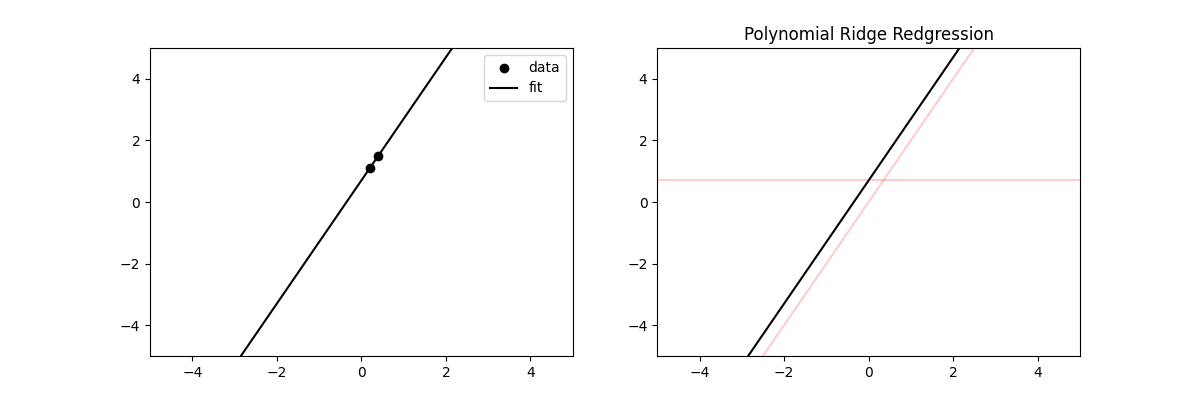

In [10]:
features = PolynomialFeatures(0)
ridge = Ridge(0, solver='auto')    

x_draw_line = np.linspace(-5, 5, 100)[:, None]

x, y = [0.2, 0.4],[1.1, 1.5]

fig, axes = plt.subplots(1, 2, figsize=[12, 4])

ax = axes[0]
plt.title('Polynomial Ridge Redgression')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)

sc = ax.scatter(x, y, c='black', label='data')

cid = fig.canvas.mpl_connect('button_press_event', onclick)


def interactive_function(degree, alpha):
    features.degree = degree
    ridge.alpha = alpha
    
    update_model()

        
interact(interactive_function, 
         degree=widgets.IntSlider(min=1, max=10, step=1, value=1, description='degree'),
         alpha=widgets.FloatSlider(min=0, max=3, step=0.01, value=0, description='regularization')
        );
ax.legend();

In [8]:
init = np.zeros(5)
init[0] = ridge.intercept_
init[1:min(4, len(ridge.coef_[1:]))+1] = ridge.coef_[1:5]
init

array([ 2.12196679, -0.11514324, -4.3631484 , -4.1700829 , -0.93555579])

interactive(children=(FloatSlider(value=2.121966789290373, description='w0', max=5.0, min=-5.0), FloatSlider(v…

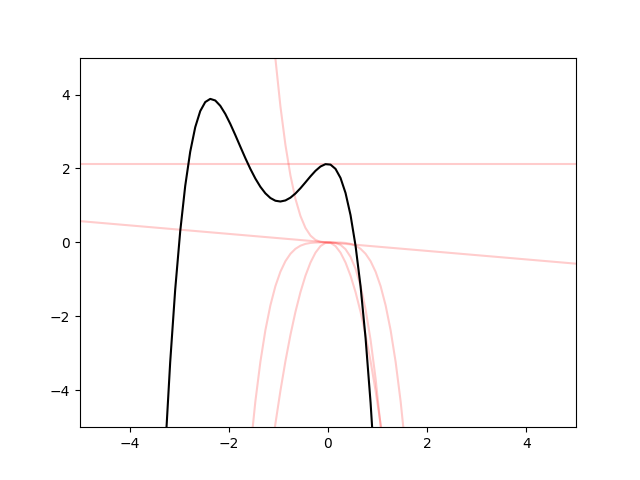

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

def interact_decomposed(w0, w1, w2, w3, w4):
    ax.lines.clear()
    y = np.zeros_like(x_draw_line)
    for i, w in enumerate([w0, w1, w2, w3, w4]):
        if w != 0:
            y_cur = w*x_draw_line**(i)
            y +=  y_cur
            ax.plot(x_draw_line, y_cur, c='red', alpha=0.2)
        
    ax.plot(x_draw_line, y, c='black')
    plt.gcf().canvas.draw_idle()
    

interact(interact_decomposed,
         w0=widgets.FloatSlider(min=-5, max=5, value=init[0]),
         w1=widgets.FloatSlider(min=-5, max=5, value=init[1]),
         w2=widgets.FloatSlider(min=-5, max=5, value=init[2]),
         w3=widgets.FloatSlider(min=-5, max=5, value=init[3]),
         w4=widgets.FloatSlider(min=-5, max=5, value=init[4]),
        );